In [7]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import json
import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets,transforms,models
from collections import OrderedDict
from PIL import Image
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
!wget -cq https://github.com/udacity/pytorch_challenge/raw/master/cat_to_name.json

In [ ]:
#Download the Flower Dataset
!wget -cq https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip 

In [17]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [8]:
!unzip -qq flower_data.zip

In [4]:
data_dir = 'flower_data'
train_dir = data_dir + '/train'
test_dir = data_dir + '/valid'

In [33]:
# TODO: Define your transforms for the training and validation sets
batch_size=40
valid_size=0.2
train_transform = transforms.Compose([transforms.RandomRotation(10),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485,0.456,0.406],
                                                         [0.229,0.224,0.225])])
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485,0.456,0.406],
                                                         [0.229,0.224,0.225])])

# TODO: Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir,transform = train_transform)
test_data = datasets.ImageFolder(test_dir,transform=test_transform)

num_train=len(train_data)
indices=list(range(num_train))
np.random.shuffle(indices)
split=int(np.floor(valid_size*num_train))
train_idx,valid_idx=indices[split:],indices[:split]


train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [9]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    cat_to_name = {int(key):val for key,val in cat_to_name.items()}
len(cat_to_name)

102

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

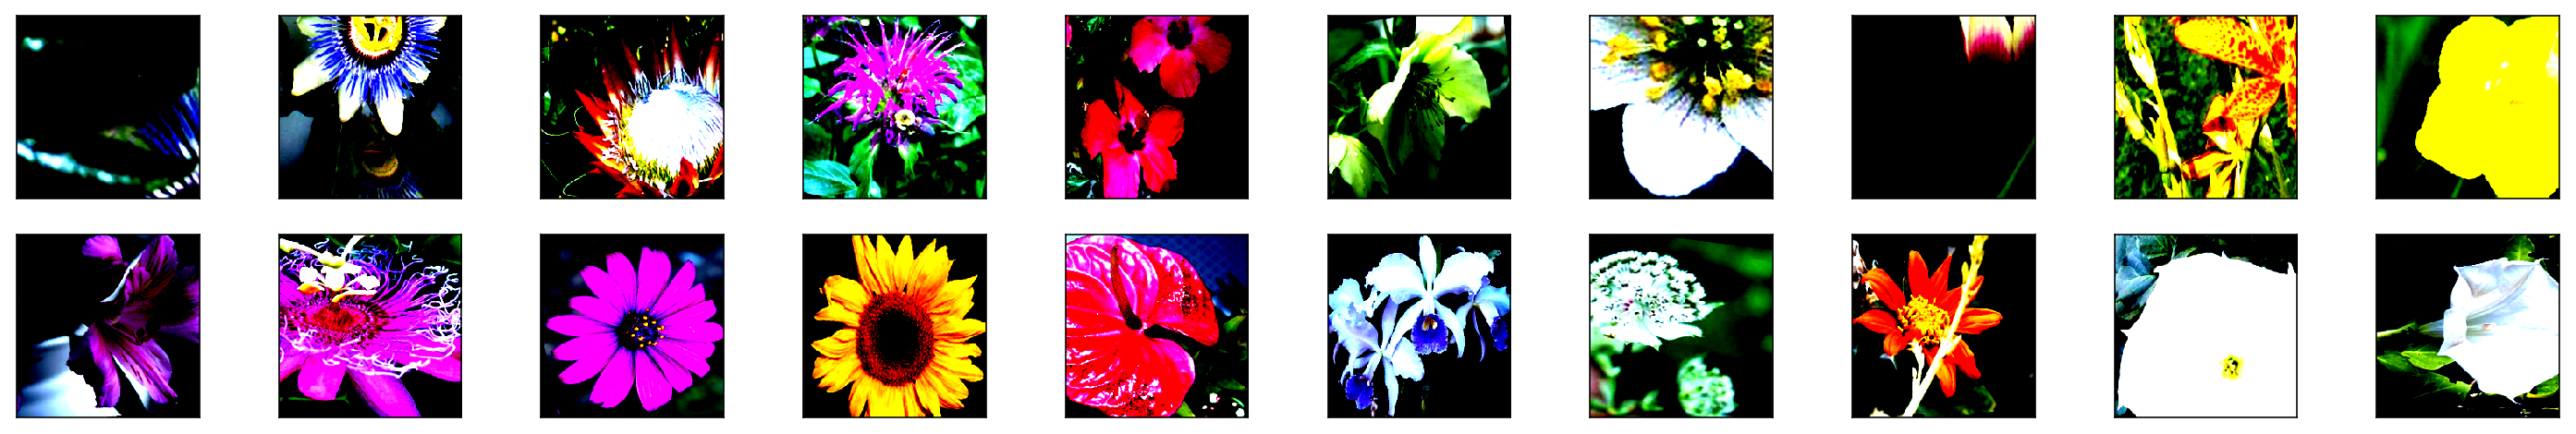

In [10]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):            
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    

In [1]:
# TODO: Build and train your # TODO: Build and train your network
model = models.resnet152(pretrained=True)
    # Freeze parameters
for param in model.parameters():
    param.requires_grad = False
    drop=0.3
    input_size = 2048
    # Defining classifier
    classifier = nn.Sequential(OrderedDict([
        ('fc1', nn.Linear(input_size, 1024)),
        ('relu', nn.ReLU()),
        ('drop', nn.Dropout(p=drop)),
        ('fc2', nn.Linear(1024, 512)),
        ('relu2', nn.ReLU()),
        ('drop2', nn.Dropout(p=drop)),
        ('fc3', nn.Linear(512, 256)),
        ('relu3', nn.ReLU()),
        ('drop3', nn.Dropout(p=drop)), 
        ('fc4', nn.Linear(256, 102)),
        ('output', nn.LogSoftmax(dim=1))
        ]))
    
    model.fc = classifier


NameError: name 'models' is not defined

In [103]:
# Device agnostic code, automatically uses CUDA if it's enabled
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [104]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [105]:
for param in model.parameters():
  param.requires_grad = True

In [106]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
val_min=np.Inf
epochs=100
for i in range(epochs):
    train_loss=0
    valid_loss=0
    accuracy=0
    model.train() #prepares for training
    for batch_idx, (data, target) in enumerate(train_loader):   #enumerate gives a counter
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            logps=model(data)
            loss=criterion(logps,target)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()
            print("Training")

    model.eval() #turns off the dropout
    for batch_idx, (data, target) in enumerate(valid_loader):
        with torch.no_grad(): #turns off gradient validation
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
                logps=model(data)
                valid_loss+=criterion(logps,target)
                ps=torch.exp(logps)
                prob,top_class=ps.topk(k=1,dim=1)
                equals=top_class==target.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
                print("Validating")

    train_loss=(train_loss/len(train_loader))
    valid_loss=(valid_loss/len(valid_loader))
    print("Epoch:{}/{}..".format(i+1,epochs))
    print("Training Loss:{:.3f}..".format(train_loss))
    print("Validation Loss:{:.3f}..".format(valid_loss))
    print("Validation Accuracy:{:.3f}".format(accuracy/len(valid_loader)))

    if valid_loss<=val_min:
        print("Validation loss has decreased!! {:.6f} ->  {:.6f}".format(val_min,valid_loss))
        torch.save(model.state_dict(),'new_model.pth')
        val_min=valid_loss


Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
T

KeyboardInterrupt: 

In [109]:
model.load_state_dict(torch.load('new_model.pth'))

In [110]:
checkpoint = {'input_size': 2048,
              'output_size': 102,
              'hidden_layers': [1024,512,256],
              'drop_out':0.3,
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint_accuracy.pth')

In [111]:
def Network(input_size, output_size, hidden_layers, drop_p):
    model = models.resnet152(pretrained=True)
    # Freeze parameters
    for param in model.parameters():
        param.requires_grad = False
        drop=drop_p
    # Defining classifier
    classifier = nn.Sequential(OrderedDict([
        ('fc1', nn.Linear(input_size, hidden_layers[0])),
        ('relu', nn.ReLU()),
        ('drop', nn.Dropout(p=drop)),
        ('fc2', nn.Linear(hidden_layers[0], hidden_layers[1])),
        ('relu2', nn.ReLU()),
        ('drop2', nn.Dropout(p=drop)),
        ('fc3', nn.Linear(hidden_layers[1], hidden_layers[2])),
        ('relu3', nn.ReLU()),
        ('drop3', nn.Dropout(p=drop)), 
        ('fc4', nn.Linear(hidden_layers[2], output_size)),
        ('output', nn.LogSoftmax(dim=1))
         ]))
    
    model.fc = classifier
    
    return model

In [112]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'],checkpoint['drop_out'])
 
    model.dropout = checkpoint['drop_out']
    model.load_state_dict(checkpoint['state_dict'],strict=False)
    
    return model

In [113]:
model=load_checkpoint('checkpoint_accuracy.pth')

In [114]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [115]:
 #Testing the model
# TODO: Do accuracy test on the test set
correct = 0
total = 0
model.to(device)
model.eval()
# criterion = nn.NLLLoss()
with torch.no_grad():
  for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
#     print("Label:",labels)
    logps = model(inputs)
#     batch_loss = criterion(logps, labels)
    ps = torch.exp(logps)
    top_p, top_class = ps.topk(1, dim=1)
#     print("Classes1:",top_class)
    top_class = top_class
    equals = top_class == labels.view(*top_class.shape)
    correct += torch.mean(equals.type(torch.FloatTensor)).item()
print('Accuracy of the network on the test images: %.2f %%' % (100 * correct / len(test_loader)))


Accuracy of the network on the test images: 97.02 %


In [73]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model
    img_loader = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])
    
    pil_image = Image.open(image)
    pil_image = img_loader(pil_image).float()
    
    np_image = np.array(pil_image)
    
    
    return np_image

In [74]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

In [86]:
def predict(image_path, model, topk=5, valid=test_data):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file
    image = process_image(image_path)
    image_tensor = torch.from_numpy(image).type(torch.FloatTensor)
    image_tensor.resize_([1, 3, 224, 224])
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    image_tensor = image_tensor.to(device)
    model = model.to(device)
    model.eval()
    
    fc_out = model(image_tensor)

    probs, classes = torch.topk(fc_out, topk)
    # get probabilities from logsoftmax-ed output
    probs = torch.exp(probs)
    # mundane python arrays are expected as an output
    probs, classes = [_ for _ in probs[0].detach().cpu().numpy()], [_ for _ in classes[0].detach().cpu().numpy()]
    idx_to_class = {val: key for key, val in (valid.class_to_idx).items()}
    top_labels = [idx_to_class[lab] for lab in classes]
    top_labels = list(map(int, top_labels))
    return probs, top_labels

In [87]:
probs, labels  = predict('flower_data/train/13/image_05753.jpg', model,topk=5)
print(probs)
print(labels)

[1.0, 1.003788e-14, 2.8524646e-15, 2.7846553e-15, 1.5845681e-15]
[13, 41, 77, 24, 17]


In [88]:
def plot_preds(image, title, preds, labels):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
    image: PIL image
    preds: list of predicted labels and their probabilities
    """

    f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})
    ax1.imshow(image)
    ax1.axis('off')
    plt.sca(ax1)
    plt.title(title)

    ax2.barh(range(len(preds)), preds, alpha=0.5)
    plt.sca(ax2)
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1.01)
    plt.ylim(len(labels), 0)
    plt.tight_layout()
    plt.show()

In [89]:
image_path ='flower_data/train/13/image_05753.jpg'

[1.0, 1.003788e-14, 2.8524646e-15, 2.7846553e-15, 1.5845681e-15]
[13, 41, 77, 24, 17]
['king protea', 'barbeton daisy', 'passion flower', 'red ginger', 'purple coneflower']


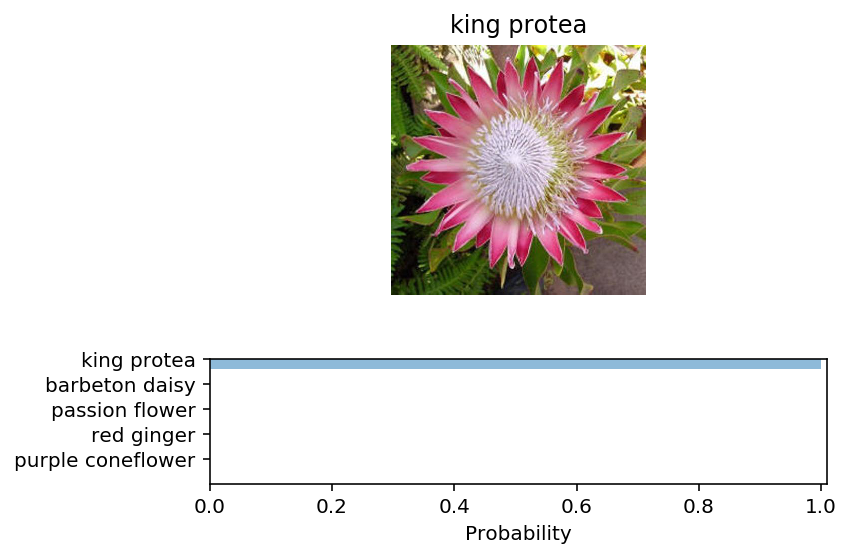

In [96]:
probs, classes = predict(image_path, model)

labels = [cat_to_name[cls] for cls in classes]
print(probs)
print(classes)
print(labels)

img = Image.open(image_path)
image_actual_label = cat_to_name[13]
plot_preds(img, image_actual_label, probs, labels);

In [97]:
print(torch.__version__)

0.4.1
